# Tanzania Water Wells Project

* Student name: Anthony Kiarie Nene
* Student pace: part time
* Scheduled project review date/time: 10th February 2023, 12.00 a.m
* Instructor name: Asha Deen, Noah Kandie, Faith Rotich

# Introduction

In this project, we set to analyze the data provided and advise the Tanzanian Government on the functionality of the wells, which wells to repair and come up with a format or pattern to buid new ones.

### The features in this dataset
* **amount_tsh** - Total static head (amount water available to waterpoint)
* **date_recorded** - The date the row was entered
* **funder** - Who funded the well
* **gps_height** - Altitude of the well
* **installer** - Organization that installed the well
* **longitude** - GPS coordinate# we start by importing the necessary libarires
* **latitude** - GPS coordinate
* **wpt_name** - Name of the waterpoint if there is one
* **num_private** -
* **basin** - Geographic water basin
* **subvillage** - Geographic location
* **region** - Geographic location
* **region_code** - Geographic location (coded)
* **district_code** - Geographic location (coded)
* **lga** - Geographic location
* **ward** - Geographic location
* **population** - Population around the well
* **public_meeting** - True/False
* **recorded_by** - Group entering this row of data
* **scheme_management** - Who operates the waterpoint
* **scheme_name** - Who operates the waterpoint
* **permit** - If the waterpoint is permitted
* **construction_year** - Year the waterpoint was constructed
* **extraction_type** - The kind of extraction the waterpoint uses
* **extraction_type_group** - The kind of extraction the waterpoint uses
* **extraction_type_class** - The kind of extraction the waterpoint uses
* **management** - How the waterpoint is managed
* **management_group** - How the waterpoint is managed
* **payment** - What the water costs
* **payment_type** - What the water costs
* **water_quality** - The quality of the water
* **quality_group** - The quality of the water
* **quantity** - The quantity of water
* **quantity_group** - The quantity of water
* **source** - The source of the water
* **source_type** - The source of the water
* **source_class** - The source of the water
* **waterpoint_type** - The kind of waterpoint
* **waterpoint_type_group** - The kind of waterpoint

In [36]:
# we start by importing the necessary libarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [37]:
#Let's load and view our training data for a better understanding of it's structure
df_wells_training = pd.read_csv('/content/Training_set_values.csv')
df_wells_training

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [38]:
df_target_variables = pd.read_csv('/content/Training_set_labels.csv')
df_target_variables

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [39]:
#now we merge the target variables and it's features
df_training_data = pd.merge(df_wells_training,df_target_variables)
df_training_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [40]:
#Let's now insepct the columns on our test data checking out the data types and overview of it's structure
df_training_data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [41]:
#checking out the data types and overview of it's structure
df_training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [42]:
#from the above, we can see that we need to convert the "date_recorded" column from an object to date formart
df_training_data['date_recorded'] = pd.to_datetime(df_training_data['date_recorded'])

In [43]:
# we will now inspect our data for null values
df_training_data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### Let's deal with the missing values

In [44]:
# We will start with the funder column
df_training_data['funder'].value_counts().head(50)

Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                                442
Amref                              425
Fini Water               

In [45]:
# from the above data, we have a 777 additional entries with zeros so we treat them as null values as well bring our 
# total to 4412

df_training_data['funder'] = df_training_data['funder'].fillna(0)# fill null with zero
df_training_data['funder'] = np.where(df_training_data['funder'] == 0, 0,df_training_data['funder'])
df_training_data['funder'] = np.where(df_training_data['funder'] == '0', 0,df_training_data['funder'])
df_training_data['funder'] = np.where(df_training_data['funder'] == 0, np.nan, df_training_data['funder'])# fill null with zero
df_training_data['funder'] = df_training_data['funder'].fillna(df_training_data['funder'].mode()[0])


In [46]:
#Let's inspect the installer column
df_training_data['installer'].value_counts().head(50)

DWE                           17402
Government                     1825
RWE                            1206
Commu                          1060
DANIDA                         1050
KKKT                            898
Hesawa                          840
0                               777
TCRS                            707
Central government              622
CES                             610
Community                       553
DANID                           552
District Council                551
HESAWA                          539
LGA                             408
World vision                    408
WEDECO                          397
TASAF                           396
District council                392
Gover                           383
AMREF                           329
TWESA                           316
WU                              301
Dmdd                            287
ACRA                            278
World Vision                    270
SEMA                        

In [47]:
# from the above we have a similar problem as the Funder column and we will sort it in the same manner
df_training_data['installer'] = df_training_data['installer'].fillna(0)# fill null with zero
df_training_data['installer'] = np.where(df_training_data['installer'] == 0, 0,df_training_data['installer'])
df_training_data['installer'] = np.where(df_training_data['installer'] == '0', 0,df_training_data['installer'])
df_training_data['installer'] = np.where(df_training_data['installer'] == 0, np.nan, df_training_data['installer'])# fill null with zero
df_training_data['installer'] = df_training_data['installer'].fillna(df_training_data['funder'].mode()[0])

In [48]:
# let's view our subvillage column to deal with the missing values
df_training_data['subvillage'].value_counts().head(50)

Madukani                508
Shuleni                 506
Majengo                 502
Kati                    373
Mtakuja                 262
Sokoni                  232
M                       187
Muungano                172
Mbuyuni                 164
Mlimani                 152
Songambele              147
Msikitini               134
Miembeni                134
1                       132
Kibaoni                 114
Kanisani                111
I                       109
Mapinduzi               109
Mjimwema                108
Mjini                   108
Mkwajuni                104
Mwenge                  102
Mabatini                 98
Azimio                   98
Mission                  95
Mbugani                  95
Bwawani                  91
Bondeni                  90
Chang'Ombe               88
Zahanati                 86
Senta                    84
Mtaa Wa Kitunda Kati     84
Kichangani               84
Misufini                 83
Center                   82
Nyerere             

In [49]:
# Calculate the mode of the subvillage column 
mode = df_training_data["subvillage"].mode()[0]

# Replace missing values in the column with the mode
df_training_data["subvillage"].fillna(mode, inplace=True)


In [50]:
# We will inspect the public meeting column for review
df_training_data['public_meeting'].value_counts().head(50)

True     51011
False     5055
Name: public_meeting, dtype: int64

In [51]:
#For the public meeting, we will as well replace the missing values with the mode
mode = df_training_data["public_meeting"].mode()[0]

# Replace missing values in the column with the mode
df_training_data["public_meeting"].fillna(mode, inplace=True)


In [52]:
#let's inspect the scheme_management to understand it's missing values
df_training_data['scheme_management'].value_counts().head(50)

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [53]:
# we will use the mode in this column to replace the missing values
mode = df_training_data["scheme_management"].mode()[0]

# Replace missing values in the column with the mode
df_training_data["scheme_management"].fillna(mode, inplace=True)


In [54]:
# The scheme name column has to be dropped as it has more than 50% of values missing
df_training_data = df_training_data.drop(columns=['scheme_name'], axis=1)

In [55]:
# Permit data:- we shall inspect to view its structure
df_training_data['permit'].value_counts().head(50)

True     38852
False    17492
Name: permit, dtype: int64

In [56]:
# since it is binary data, we will replace with the mode as well
mode = df_training_data["permit"].mode()[0]

# Replace missing values in the column with the mode
df_training_data["permit"].fillna(mode, inplace=True)


In [57]:
# We can inspect our entire data to see if there are any missing values left
df_training_data.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

### Let's now check for duplicates in our data

In [58]:
# In case of any duplicates, they will be dropped
df_training_data.duplicated().value_counts()

False    59400
dtype: int64

## We will now repeat the above processes on our test data

In [59]:
test_data = pd.read_csv('/content/Test_set_values.csv')
test_data 

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [60]:
#since we are performing the same operations on the test data as we did on the training data, we will 
#use the above codes and place them on one cell

# begin with dealing with the missing values on the funder column
test_data['funder'] = test_data['funder'].fillna(0)# fill null with zero
test_data['funder'] = np.where(test_data['funder'] == 0, 0,test_data['funder'])
test_data['funder'] = np.where(test_data['funder'] == '0', 0,test_data['funder'])
test_data['funder'] = np.where(test_data['funder'] == 0, np.nan, test_data['funder'])# fill null with zero
test_data['funder'] = test_data['funder'].fillna(test_data['funder'].mode()[0])

# Let's repeat the same on the installer column
test_data['installer'] = test_data['installer'].fillna(0)# fill null with zero
test_data['installer'] = np.where(test_data['installer'] == 0, 0,test_data['installer'])
test_data['installer'] = np.where(test_data['installer'] == '0', 0,test_data['installer'])
test_data['installer'] = np.where(test_data['installer'] == 0, np.nan, test_data['installer'])# fill null with zero
test_data['installer'] = test_data['installer'].fillna(test_data['installer'].mode()[0])

# Calculate the mode of the subvillage column
mode = test_data["subvillage"].mode()[0]

# Replace missing values in the column with the mode
test_data["subvillage"].fillna(mode, inplace=True)

# Calculate the mode of the public_meeting column
mode = test_data["public_meeting"].mode()[0]

# Replace missing values in the column with the mode
test_data["public_meeting"].fillna(mode, inplace=True)

#  Calculate the mode of the scheme_management column
mode = test_data["scheme_management"].mode()[0]

# Replace missing values in the column with the mode
test_data["scheme_management"].fillna(mode, inplace=True)

# The scheme name column has to be dropped as it has more than 50% of values missing
test_data = test_data.drop(columns=['scheme_name'], axis=1)

# since it is binary data, we will replace with the mode as well
mode = test_data["permit"].mode()[0]

# Replace missing values in the column with the mode
test_data["permit"].fillna(mode, inplace=True)


In [61]:
# We can inspect our entire data to see if there are any missing values left
test_data.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [62]:
# There are several columns that we will drop as they are not very useful when it comes to our modelling
# Where the columns might be needed moving forward, they can be readded accordingly
df_training_data = df_training_data.drop(['longitude', 'latitude','date_recorded', 'region_code', 'district_code',
                  'num_private', 'id', 'payment', 'management', 
                  'extraction_type_class', 'extraction_type_group', 'recorded_by','region', 'lga',
                  'ward', 'wpt_name', 'quantity',  'quality_group', 'source'],axis=1)
test_data = test_data.drop(['longitude', 'latitude','date_recorded', 'region_code', 'district_code',
                  'num_private', 'id', 'payment', 'management', 
                  'extraction_type_class', 'extraction_type_group', 'recorded_by','region', 'lga',
                  'ward', 'wpt_name', 'quantity',
                 'quality_group', 'source'],axis=1)


In [63]:
df_training_data.shape

(59400, 21)

In [64]:
test_data.shape

(14850, 20)

## Modelling 

###### There are 8 stages when it comes to modelling, we have covered the first three and for this section we will focus on the remaining 5 namely:
* Splitting the data: We need to split the data into training and test sets. We will train our model on the training data and evaluate its performance on the test data.

* Model selection: After splitting the data, we will need to select the appropriate model for your data, (There are many algorithms to choose from, including linear regression, logistic regression, decision trees, and support vector machines). We shall use cross validation to compare our models
* Model training: After selecting the model, we shall train it on the training data. This will involve estimating the model parameters based on the training data.

* Model evaluation: After training the model, we need to evaluate its performance on the test data (There are many metrics to evaluate the performance of a model, including accuracy, precision, recall, F1-score, and ROC AUC.)

* Model tuning: If we see the performance of the model is not satisfactory, we will try tuning the model parameters to improve its performance using grid search

* Model deployment: Once we are satisfied by the performance of our model, we will now deploy it on production environment to make predictions on our new data (test_data).


### Logistic Regression

In [65]:
# Select the categorical columns you want to encode
categorical_columns = ["funder", "installer", "scheme_management",'management_group','payment_type','water_quality','permit','public_meeting']
# Use Pandas get_dummies method to create the OHE data
df_ohe = pd.get_dummies(df_training_data, columns=categorical_columns, prefix=categorical_columns, drop_first=True)
df_ohe

,amount_tsh,gps_height,basin,subvillage,population,construction_year,extraction_type,quantity_group,source_type,source_class,...,payment_type_unknown,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,permit_True,public_meeting_True
0,6000.0,1390,Lake Nyasa,Mnyusi B,109,1999,gravity,enough,spring,groundwater,...,0,0,0,0,0,0,1,0,0,1
1,0.0,1399,Lake Victoria,Nyamara,280,2010,gravity,insufficient,rainwater harvesting,surface,...,0,0,0,0,0,0,1,0,1,1
2,25.0,686,Pangani,Majengo,250,2009,gravity,enough,dam,surface,...,0,0,0,0,0,0,1,0,1,1
3,0.0,263,Ruvuma / Southern Coast,Mahakamani,58,1986,submersible,dry,borehole,groundwater,...,0,0,0,0,0,0,1,0,1,1
4,0.0,0,Lake Victoria,Kyanyamisa,0,0,gravity,seasonal,rainwater harvesting,surface,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210,Pangani,Kiduruni,125,1999,gravity,enough,spring,groundwater,...,0,0,0,0,0,0,1,0,1,1
59396,4700.0,1212,Rufiji,Igumbilo,56,1996,gravity,enough,river/lake,surface,...,0,0,0,0,0,0,1,0,1,1
59397,0.0,0,Rufiji,Madungulu,0,0,swn 80,enough,borehole,groundwater,...,0,1,0,0,0,0,0,0,0,1
59398,0.0,0,Rufiji,Mwinyi,0,0,nira/tanira,insufficient,shallow well,groundwater,...,0,0,0,0,0,0,1,0,1,1


In [66]:
# Split the data into features (X) and target (y) variables
X = df_ohe.drop([ 'basin', 'subvillage',  'subvillage','quantity_group',
       'source_type', 'source_class', 'waterpoint_type','waterpoint_type_group','extraction_type','status_group'], axis=1)
y = df_ohe['status_group']

In [67]:
# Normalize the feature data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.89566509,  1.04125207, -0.15039928, ..., -0.18058924,
        -1.54784951,  0.30498662],
       [-0.10597003,  1.05423701,  0.21228981, ..., -0.18058924,
         0.64605764,  0.30498662],
       [-0.09762988,  0.02554104,  0.14866014, ..., -0.18058924,
         0.64605764,  0.30498662],
       ...,
       [-0.10597003, -0.96420011, -0.38158706, ..., -0.18058924,
        -1.54784951,  0.30498662],
       [-0.10597003, -0.96420011, -0.38158706, ..., -0.18058924,
         0.64605764,  0.30498662],
       [-0.10597003, -0.68863079, -0.06343874, ..., -0.18058924,
         0.64605764,  0.30498662]])

In [68]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

Test accuracy: 0.67
                         precision    recall  f1-score   support

             functional       0.72      0.78      0.75      6444
functional needs repair       0.32      0.23      0.27       867
         non functional       0.68      0.64      0.66      4569

               accuracy                           0.69     11880
              macro avg       0.58      0.55      0.56     11880
           weighted avg       0.68      0.69      0.68     11880



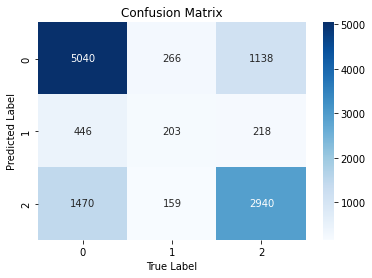

In [75]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the accuracy of the model on the test data
score = model.score(X_test, y_test)

print(f'Test accuracy: {score:.2f}')
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

The test accuracy of 0.67 indicates that the classifier is correctly classifying the target variable 67% of the time. The precision, recall, and f1-score values provide additional information about the performance of the classifier.

For the "functional" class, the precision is 0.72, which means that when the classifier predicts that a sample is "functional", it is correct 72% of the time. The recall of 0.78 indicates that 78% of the "functional" samples were correctly identified. The f1-score of 0.75 represents the harmonic mean of precision and recall, and gives an overall measure of the quality of the classifier's predictions.

The same analysis can be done for the other two classes. It's worth noting that the classifier is having a harder time classifying "functional needs repair" samples, as evidenced by the lower precision, recall, and f1-score values compared to the other two classes.

### Decision Trees

Training Accuracy: 0.9072390572390573
Test Accuracy: 0.6888047138047138
                         precision    recall  f1-score   support

             functional       0.72      0.78      0.75      6444
functional needs repair       0.32      0.23      0.27       867
         non functional       0.68      0.64      0.66      4569

               accuracy                           0.69     11880
              macro avg       0.58      0.55      0.56     11880
           weighted avg       0.68      0.69      0.68     11880



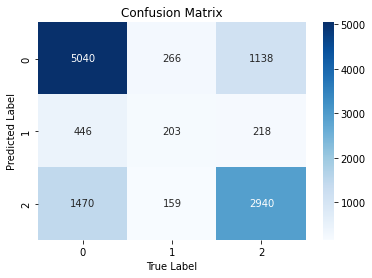

In [76]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state = 0)

# Train the model
clf.fit(X_train, y_train)

# Predict the target values for the training data
y_train_pred = clf.predict(X_train)

# Evaluate the model accuracy using the training data
train_accuracy = clf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)


# Make predictions on the test set
y_test_pred = clf.predict(X_test)

# Evaluate the model's test accuracy
acc = accuracy_score(y_test, y_test_pred)
print('Test Accuracy:', acc)
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

###### we will now perform hyperparameter tuning on our decision tree model using grid search

In [77]:
# Define the hyperparameters to tune and the values to try
param_grid = {'max_depth': [8,10], 'min_samples_split': [10,12], 'criterion': ['gini', 'entropy']}

# Create a grid search object with a 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 12}
Best score: 0.6682449494949496


The training accuracy of the model is 0.9072390572390573, which means that about 90% of the time the model is able to correctly predict the target variable for the training data. The test accuracy of the model is 0.6888047138047138, which means that about 69% of the time the model is able to correctly predict the target variable for the test data.

The precision, recall, and f1-score give us a more detailed view of the model's performance. The precision is a measure of how many of the positive predictions made by the model are actually correct. The recall is a measure of how many of the positive instances were correctly predicted by the model. The f1-score is a weighted average of the precision and recall. In this case, the weighted average of the precision and recall for the "functional" class is 0.72, for the "functional needs repair" class it's 0.32, and for the "non functional" class it's 0.68.

### Random Forest

Training accuracy: 1.0
Accuracy: 0.719023569023569
                         precision    recall  f1-score   support

             functional       0.74      0.82      0.78      6444
functional needs repair       0.41      0.22      0.28       867
         non functional       0.72      0.67      0.69      4569

               accuracy                           0.72     11880
              macro avg       0.62      0.57      0.59     11880
           weighted avg       0.71      0.72      0.71     11880



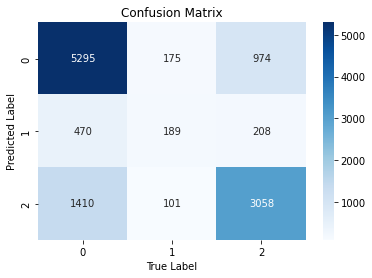

In [81]:
# Create the Random Forest classifier
clf = RandomForestClassifier(random_state=0)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the target variable on the train data
y_train_pred = clf.predict(X_train)

# Evaluate the accuracy of the classifier on the train data
accuracy = clf.score(X_train,y_train_pred)
print("Training accuracy:", accuracy)


# Predict the target variable on the test data
y_test_pred = clf.predict(X_test)

# Evaluate the accuracy of the classification
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

The classification report above provides detailed information on the performance of the model on the test data. The precision, recall, and f1-score are measures of the performance of the classifier. The precision of the 'functional' class is 0.74, which means that 74% of the instances the classifier labeled as 'functional' are indeed functional. The recall of the 'functional' class is 0.82, which means that 82% of the functional instances are correctly labeled as 'functional' by the classifier. The f1-score is a weighted average of the precision and recall and is a good measure of the overall performance of the classifier.

### Conclusion
From the above models, it is safe to pick the random forests model as it has the highest accuracy scores of the three.

This in turn suggests that most wells are functional and well managed.
We can conclude that there are also quite a huge number of non-functional wells that need repair 

### Recomendations

*   The government to increase the number of wells within the country
*   More funding is required to build, operate and maintain new wells 

